# Tarea 3: R

Tanto esta tarea como la tarea 2 la hicimos Regina García y Fernanda Hinze juntas.

In [50]:
install.packages("plotly")
install.packages("Sleuth2")
install.packages("gridExtra")
install.packages("ggthemes")

# Importamos las siguientes librerias ---------------------------------------------------------------

library(tidyverse)
library(readxl)
library(plotly)
library(ggplot2)
library(dplyr)
library(gridExtra)
library(tidyr)
library(ggthemes)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### Parte 1

De la base de datos de proyecciones poblacionales de CONAPO, hacer al menos 5 visualizaciones para entender el crecimiento poblacional. Se tienen muchas variables y categorías por explorar, se espera un análisis y contexto de las gráficas así como una interpretación.

**Anotación importante** 
Hicimos únicamente 4 visualizaciones en lugar de 5 porque casi todas las nuestras incluyen más de una gráfica. También consideramos que en esas 4 visualizaciones se concentra la información más relevante sobre nuestra base de datos. 

In [3]:
#Declaramos la ruta y leemos los datos
datos <- read.csv('pob_mit_proyecciones.csv', fileEncoding = 'Latin1')
colnames(datos)[2] <- 'YEAR'

`summarise()` ungrouping output (override with `.groups` argument)



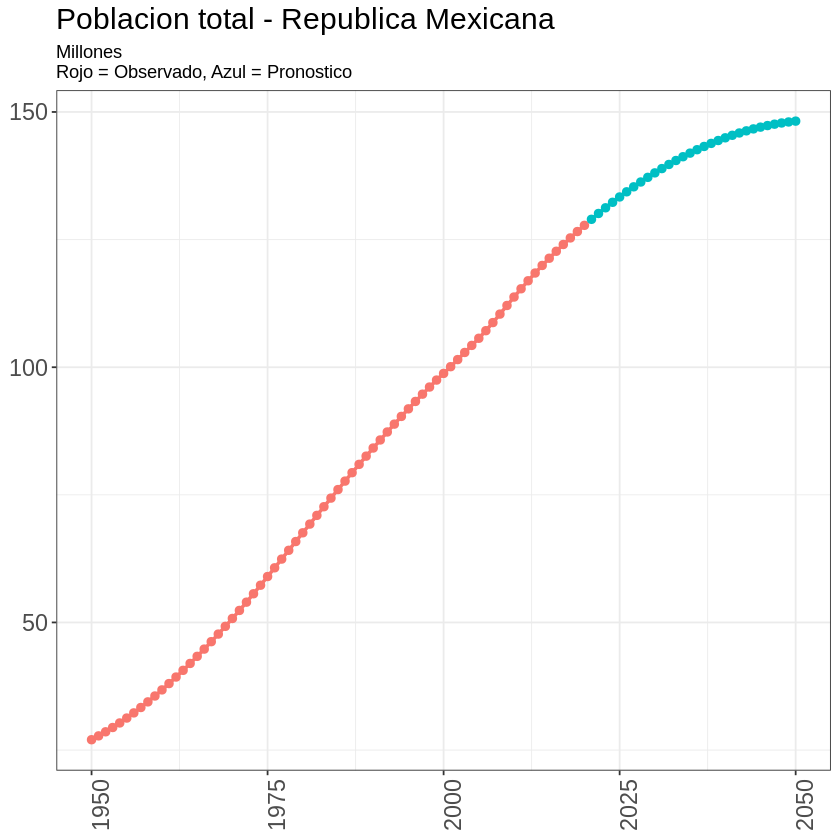

In [4]:
#Población total

datos %>% 
  filter(ENTIDAD == 'República Mexicana') %>%
  group_by(YEAR) %>% 
  summarise(POBLACION = sum(POBLACION)/1e6) %>% 
  mutate(FORECAST = ifelse(YEAR > 2020, 1, 0)) %>% 
  ggplot(aes(x = YEAR, y = POBLACION, color = factor(FORECAST)))+
  geom_line(size = 1)+
  geom_point(size = 2)+
  theme_bw()+
  theme(legend.position = 'none',
        axis.text = element_text(size = 14),
        axis.title = element_blank(),
        plot.title = element_text(size = 18),
        axis.text.x = element_text(angle = 90))+
  labs(title = 'Poblacion total - Republica Mexicana',
       subtitle = 'Millones\nRojo = Observado, Azul = Pronostico')

En la gráfica observamos la población total de la República Mexicana en función de los años, los cuales los mostramos en un periodo de 1950 a 2050. Los puntos rojos representan datos observados, los puntos azules un pronóstico de cómo se espera que se comporte el crecimiento de la población en un futuro no tan lejano. 

Desde 1950 se ha observado un crecimiento casi constante en la población, sin embargo a partir del 2025 el crecimiento será mucho menor a los años pasados. Se espera que para 2050 lleguemos a los 150 millones de habitantes. Si esto ocurre, podremos asegurar que la población sería 15 veces mayor a la de 1950. 

`summarise()` regrouping output by 'ENTIDAD' (override with `.groups` argument)



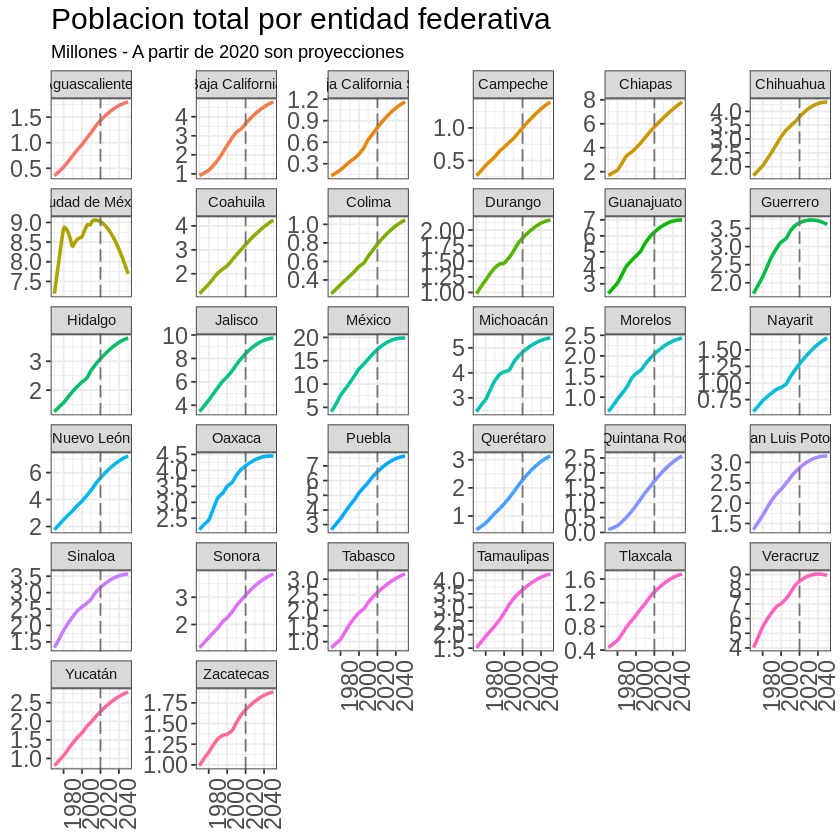

In [5]:
#Población total por estado

datos_agregado_por_estado <- datos %>% 
  filter(ENTIDAD != 'República Mexicana') %>% 
  group_by(ENTIDAD,YEAR) %>% 
  summarise(POBLACION = sum(POBLACION)/1e6)

datos_agregado_por_estado %>% 
  ggplot(aes(x = YEAR, y = POBLACION, color = ENTIDAD))+
  geom_line(size = 1)
  theme_bw()+
  geom_vline(xintercept = 2020, color = 'grey45', linetype = 'longdash')+
  theme(legend.position = 'none',
        axis.text = element_text(size = 14),
        axis.title = element_blank(),
        plot.title = element_text(size = 18),
        axis.text.x = element_text(angle = 90))+
  facet_wrap(~ENTIDAD, scales = 'free_y')+
  labs(title = 'Poblacion total por entidad federativa',
       subtitle = 'Millones - A partir de 2020 son proyecciones')

Presentamos 32 gráficas, cada una representa la población total de cada entidad federativa en millones de habitantes. Podemos notar que la mayoría de los estados presenta un comportamiento muy similar, a excepción de la Ciudad de México, Durango, Michoacán y Zacatecas. La Ciudad de México muestra la diferencia más notoria, partiendo de su elevada concentración poblacional y prosiguiendo a un crecimiento muy elevado alrededor de 1950-1970. Por 1980 se presenta una caída en la población, misma que se recupera para el 2020. Como pronóstico, a diferencia de todos los demás estados, es el único que presenta una disminución drástica en sus habitantes. 

`summarise()` regrouping output by 'SEXO', 'EDAD' (override with `.groups` argument)



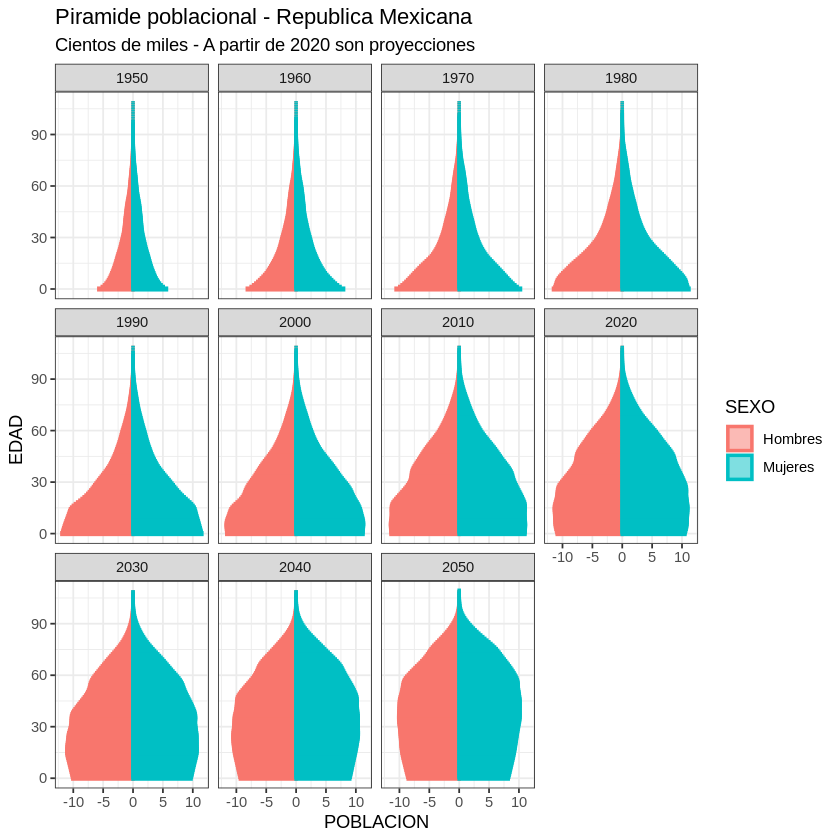

In [6]:
#Por edad

datos_agregado_edad <- datos %>% 
  filter(YEAR%%10 == 0) %>% 
  filter(ENTIDAD == 'República Mexicana') %>% 
  group_by(SEXO, EDAD,YEAR) %>% 
  mutate(POBLACION = ifelse(SEXO == 'Hombres', -POBLACION, POBLACION)) %>% 
  summarise(POBLACION = sum(POBLACION)/1e5)

datos_agregado_edad %>% 
  ggplot(aes(y = POBLACION, x = EDAD, color = SEXO, fill = SEXO))+
  geom_col(size = 1, alpha = 0.5)+
  theme_bw()+
  coord_flip()+
  facet_wrap(~YEAR)+
  labs(title = 'Piramide poblacional - Republica Mexicana',
       subtitle = 'Cientos de miles - A partir de 2020 son proyecciones')

ggsave('piramide.jpg',width = 10, height = 8)

Mostramos las pirámides poblacionales correspondientes a todas las décadas desde 1050 hasta 2050. Considerando la información que obtuvimos en el primer gráfico no nos sorprende que la pirámide se vaya haciendo cada vez más ancha conforme pasan los años, ya que la población en toda la República Mexicana aumenta. 

Es importante mencionar que la esperanza de vida también se ve afectada, la cantidad de gente que llega a vivir más de 60 años ha aumentado más del doble. La natalidad se espera que se mantenga relativamente igual partiendo del 2020. En general, se espera que la población entre 30 y 60 años crezca más que cualquier otro grupo de edad.

Otro punto importante que se puede apreciar en estos gráficos es que la proporción de mujeres y hombres se mantiene relativamente constante a lo largo de estos 100 años. 

`summarise()` regrouping output by 'ENTIDAD' (override with `.groups` argument)



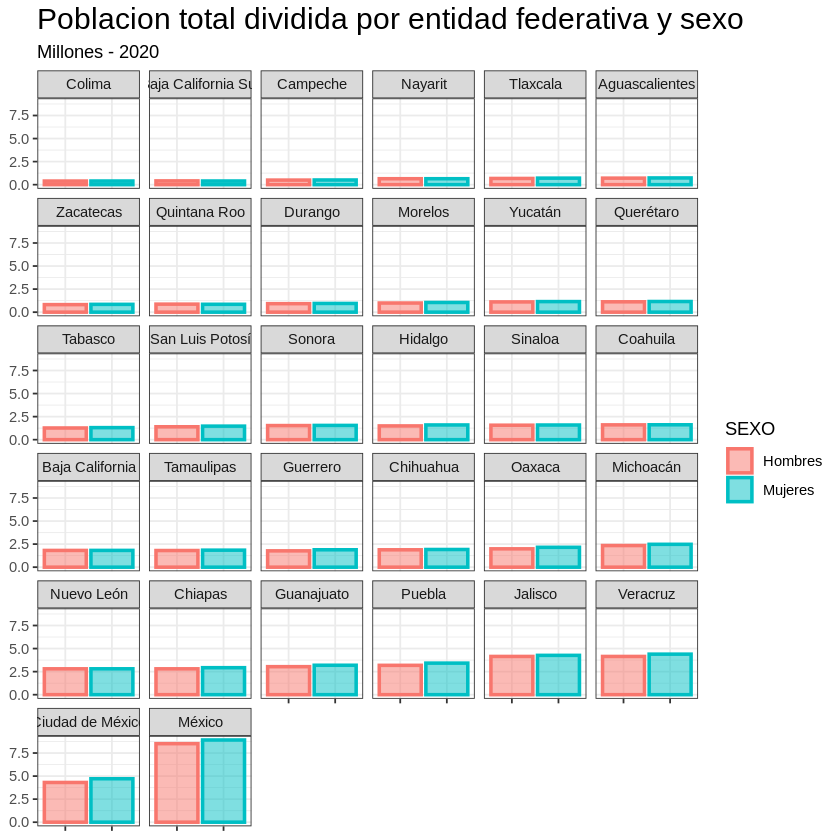

In [7]:
#Estado - sexo

datos %>% 
  filter(YEAR == 2020,
         ENTIDAD != 'República Mexicana') %>% 
  group_by(ENTIDAD, SEXO) %>% 
  summarise(POBLACION = sum(POBLACION)/1e6) %>% 
  ggplot(aes(x = SEXO, y = POBLACION, color = SEXO, fill = SEXO))+
  geom_col(size = 1, alpha = 0.5)+
  theme_bw()+
  theme(axis.text.x = element_blank(),
        axis.title = element_blank(),
        plot.title = element_text(size = 18))+
  facet_wrap(~reorder(ENTIDAD,POBLACION))+
  labs(title = 'Poblacion total dividida por entidad federativa y sexo',
       subtitle = 'Millones - 2020')
  
ggsave('agregado_por_estado_y_sexo.jpg',width = 10, height = 8)

A diferencia de la visualización que obtuvimos en el punto 2, en estos gráficos podemos reconocer más rápido la diferencia entre la cantidad de habitantes de cada estado, además de su proporción de hombres y mujeres en el año 2020. Para tener una mejor visualización de los datos hemos ordenado los estados de menos a más poblados. Notamos que en la mayoría de las entidades federativas la porpoción de género está balanceada, conclusión que es consistente con la visualización que obtuvmos en el punto 3, en el gráfico correspondiente al año 2020.

### Parte 2

Con la misma base de datos, se requiere hacer todas las visualizaciones interactivas; las mismas 5 o más visualizaciones, ahora interactivas (recuerden plot.ly). 

**Sugerencia:** el año tiene que ser una de estas categorías ya que son proyecciones.

In [40]:
ggplotly(datos_agregado_edad)

ERROR: Error in UseMethod("ggplotly", p): no applicable method for 'ggplotly' applied to an object of class "c('grouped_df', 'tbl_df', 'tbl', 'data.frame')"


#Okay, llevamos un rato intentando sacar esto pero no nos sale, nos da mucha pena pero de verdad no entendemos de dónde viene el error, ya lo intentamos con nuestras 4 visualizaciones y no sale :((
  

### Parte 3

Hacer todos los ejercicios hechos durante la clase.

- Ejercicios durante la sesión 1
- Visualizaciones interactivas para el cruce de variables filtrado por sexo.

#### Sección1: Titanic

In [32]:
Titanic <- data.frame(Titanic)
head(Titanic)

,Class,Sex,Age,Survived,Freq
,<fct>,<fct>,<fct>,<fct>,<dbl>
1,1st,Male,Child,No,0
2,2nd,Male,Child,No,0
3,3rd,Male,Child,No,35
4,Crew,Male,Child,No,0
5,1st,Female,Child,No,0
6,2nd,Female,Child,No,0


¿Qué se les ocurre para graficar todo?

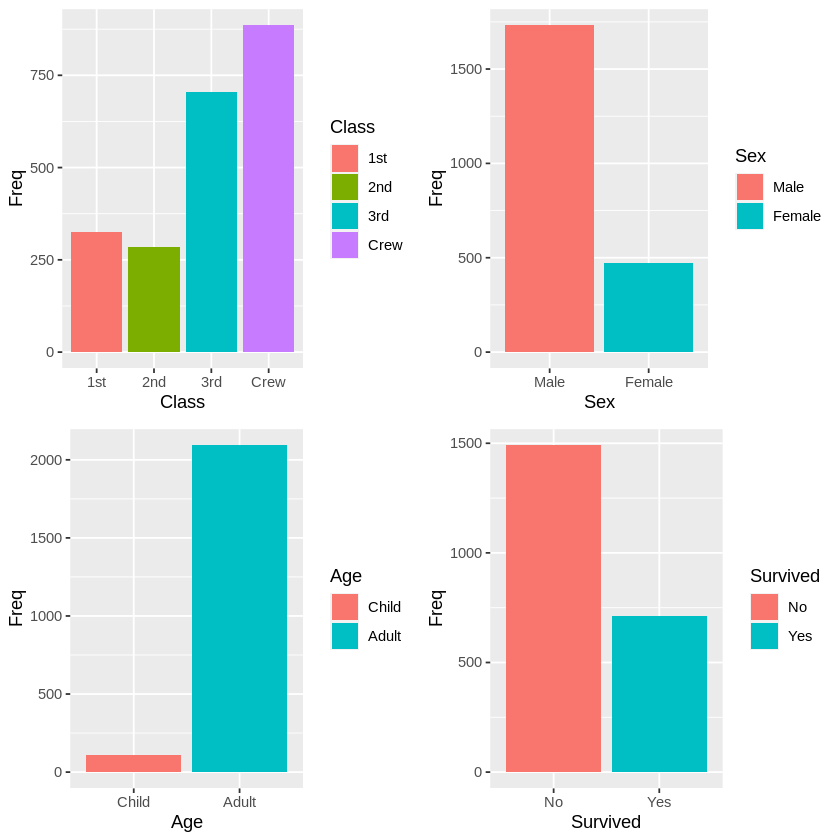

In [41]:
t_class  <- ggplot(Titanic, aes(Class, Freq, fill = Class)) + geom_col() 
t_sex  <-  ggplot(Titanic, aes(Sex, Freq, fill = Sex)) + geom_col()
t_age  <-  ggplot(Titanic, aes(Age, Freq, fill = Age)) + geom_col()
t_survived  <-  ggplot(Titanic, aes(Survived, Freq, fill = Survived)) + geom_col()
grid.arrange(t_class, t_sex, t_age, t_survived)

- ¿Cuántos pasajeros en total viajaban por clase?

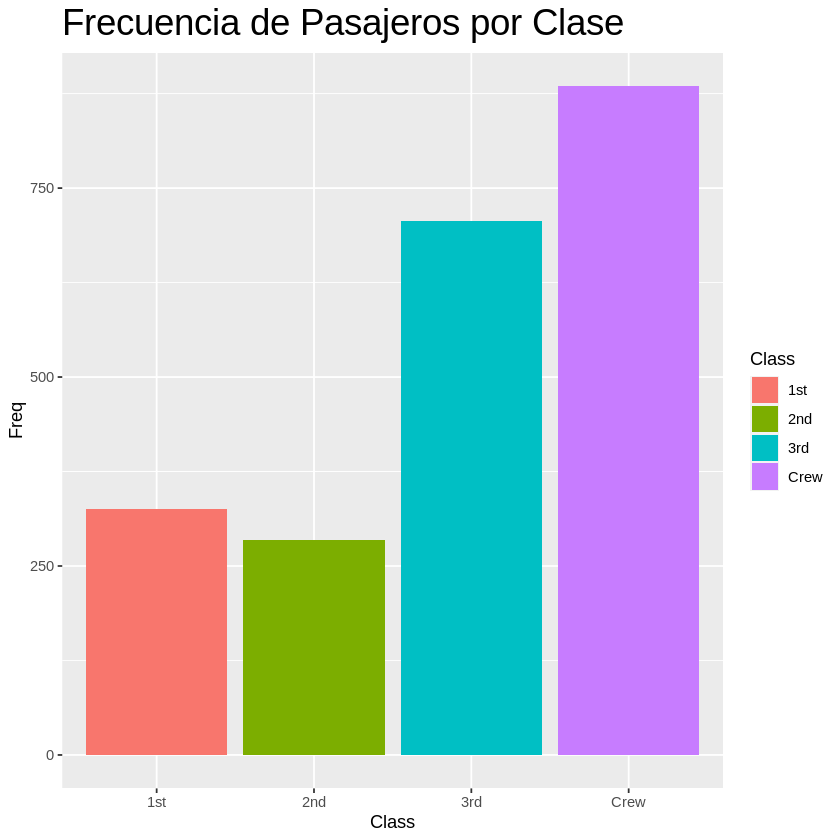

In [45]:
t_class + ggtitle("Frecuencia de Pasajeros por Clase") + theme(plot.title = element_text(size=22))

- Exploren una por una las otras variables categóricas del dataset

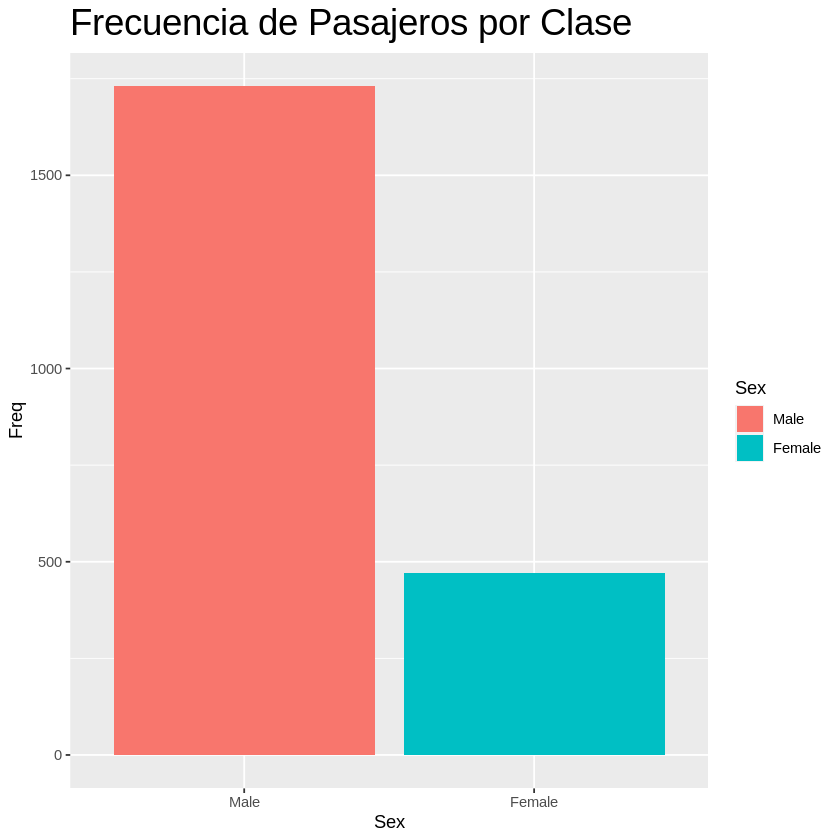

In [44]:
t_sex + ggtitle("Frecuencia de Pasajeros por Clase") + theme(plot.title = element_text(size=22))

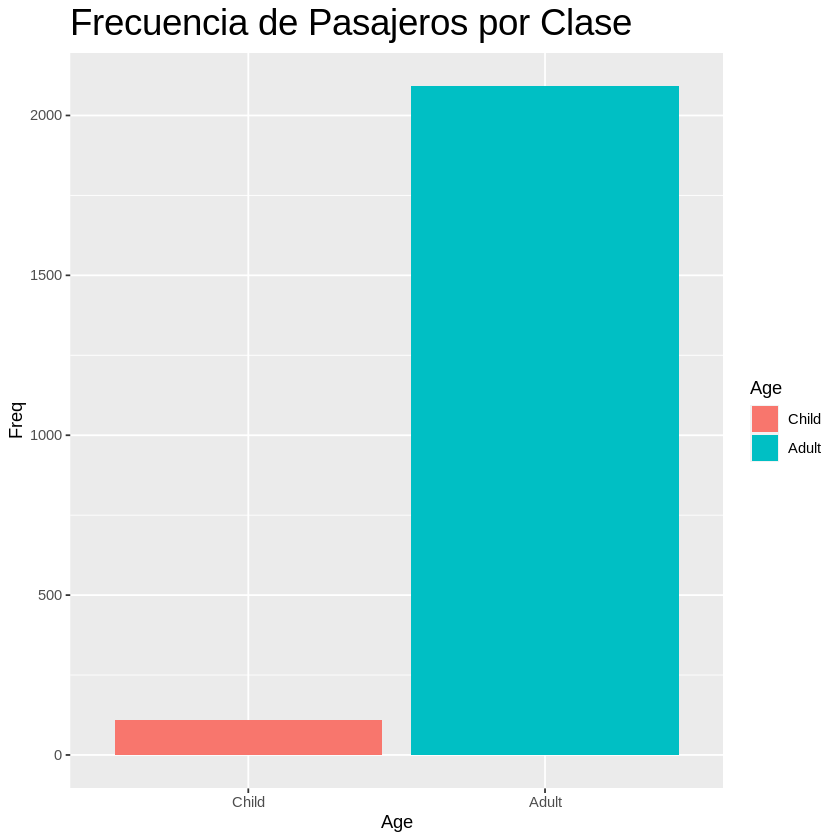

In [46]:
t_age + ggtitle("Frecuencia de Pasajeros por Clase") + theme(plot.title = element_text(size=22))

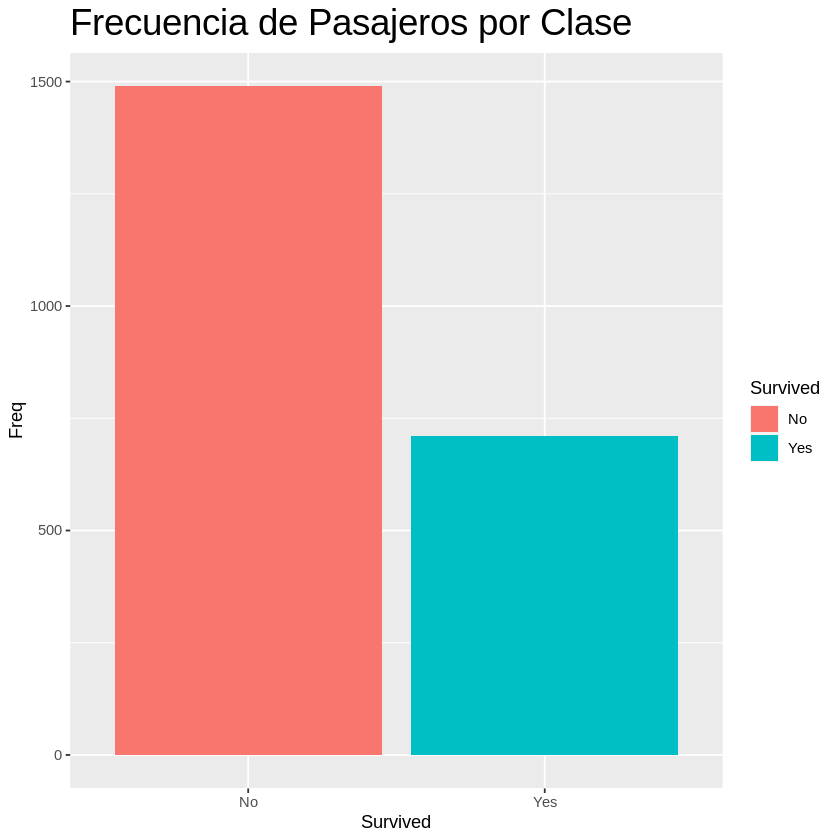

In [47]:
t_survived + ggtitle("Frecuencia de Pasajeros por Clase") + theme(plot.title = element_text(size=22))

**Sección 2: Bancos**

Dentro del paquete Sleuth2, los datos: case1202, tiene tres variables medidas en meses, de: Edad, Seniority, Experience.

¿Qué hay en la matriz de scatterplots? ¿Por?

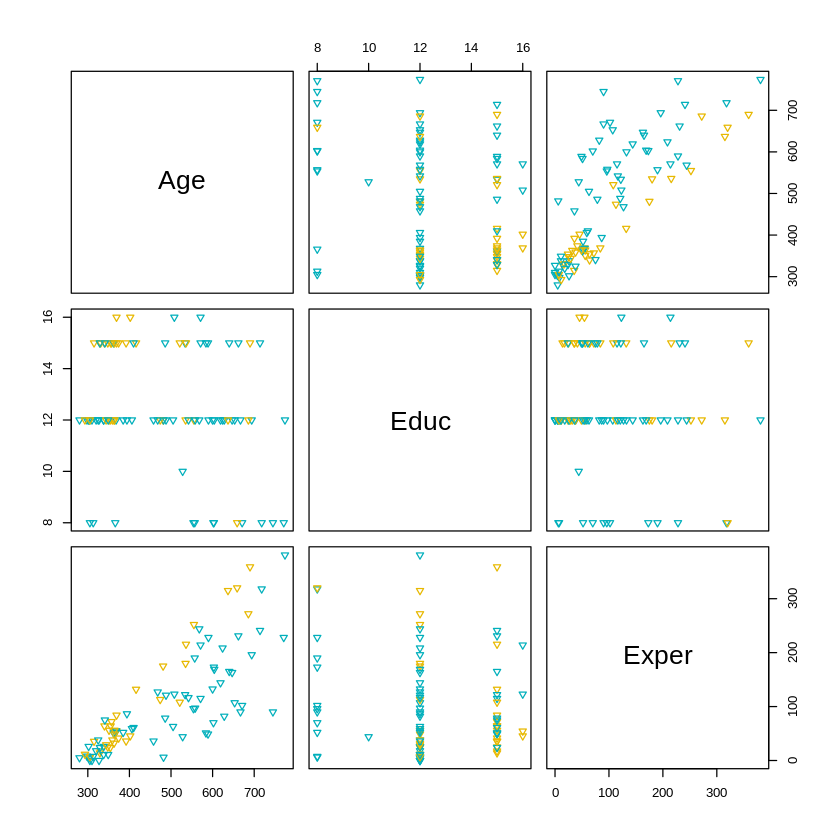

In [51]:
data(case1202, package="Sleuth2")

case <- data.frame(case1202)

colors <- c("#00AFBB", "#E7B800")  

pairs(case[,5:7], pch = 25, cex = 0.9,
      col = colors[case$Sex])

En la matriz de scatterplots tenemos 3 sub-scatterplots, los tres ejes son edad, educación y experiencia. 

**Adicional: películas**

¿Cómo se ve el scatterplpot si quitamos los que tienen más de 1000 votos? Ahora filtremos los mayores a 9. ¿Pasa algo?

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



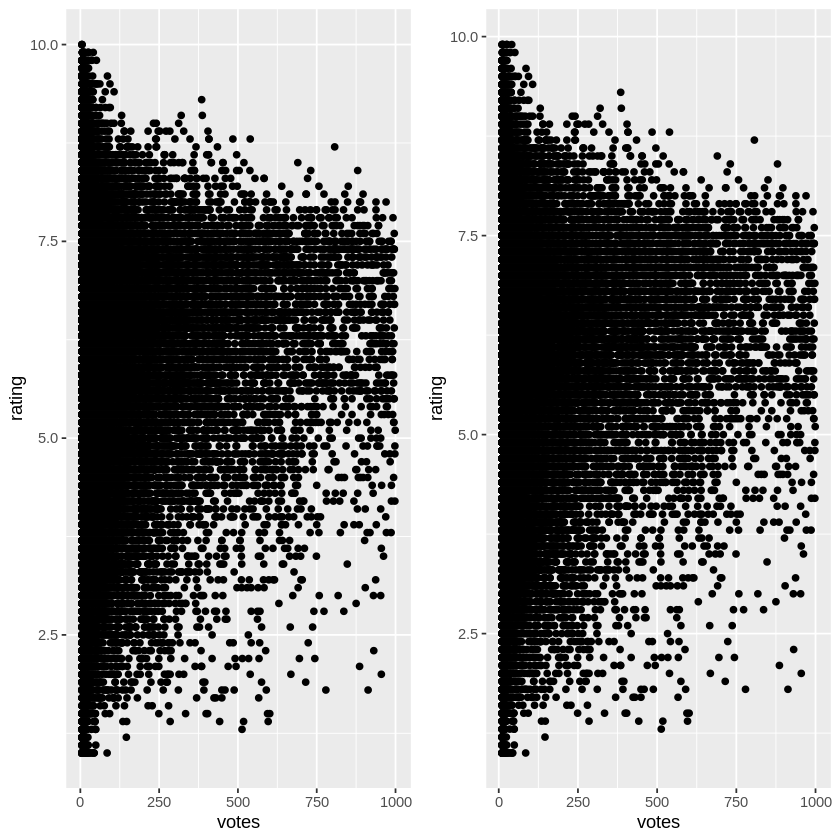

In [52]:
install.packages("ggplot2movies")
library(ggplot2movies)

movies1  <- movies %>% filter(votes < 1000) %>% ggplot(aes(votes, rating)) + geom_point()
movies2  <- movies %>% filter(votes < 1000, votes > 9) %>% ggplot(aes(votes, rating)) + geom_point()
grid.arrange(movies1, movies2, ncol = 2)